In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
redis = pd.read_csv('roland_redis_test_results - Copy.csv')
qdrant = pd.read_csv('roland_qdrant_test_results.csv')
chroma = pd.read_csv('roland_chroma_test_results.csv')

redis = redis.iloc[:, 2:].drop(['query'], axis=1)
qdrant = qdrant.iloc[:, 2:].drop(['query'], axis=1)
chroma = chroma.iloc[:, 2:].drop(['query'], axis=1)

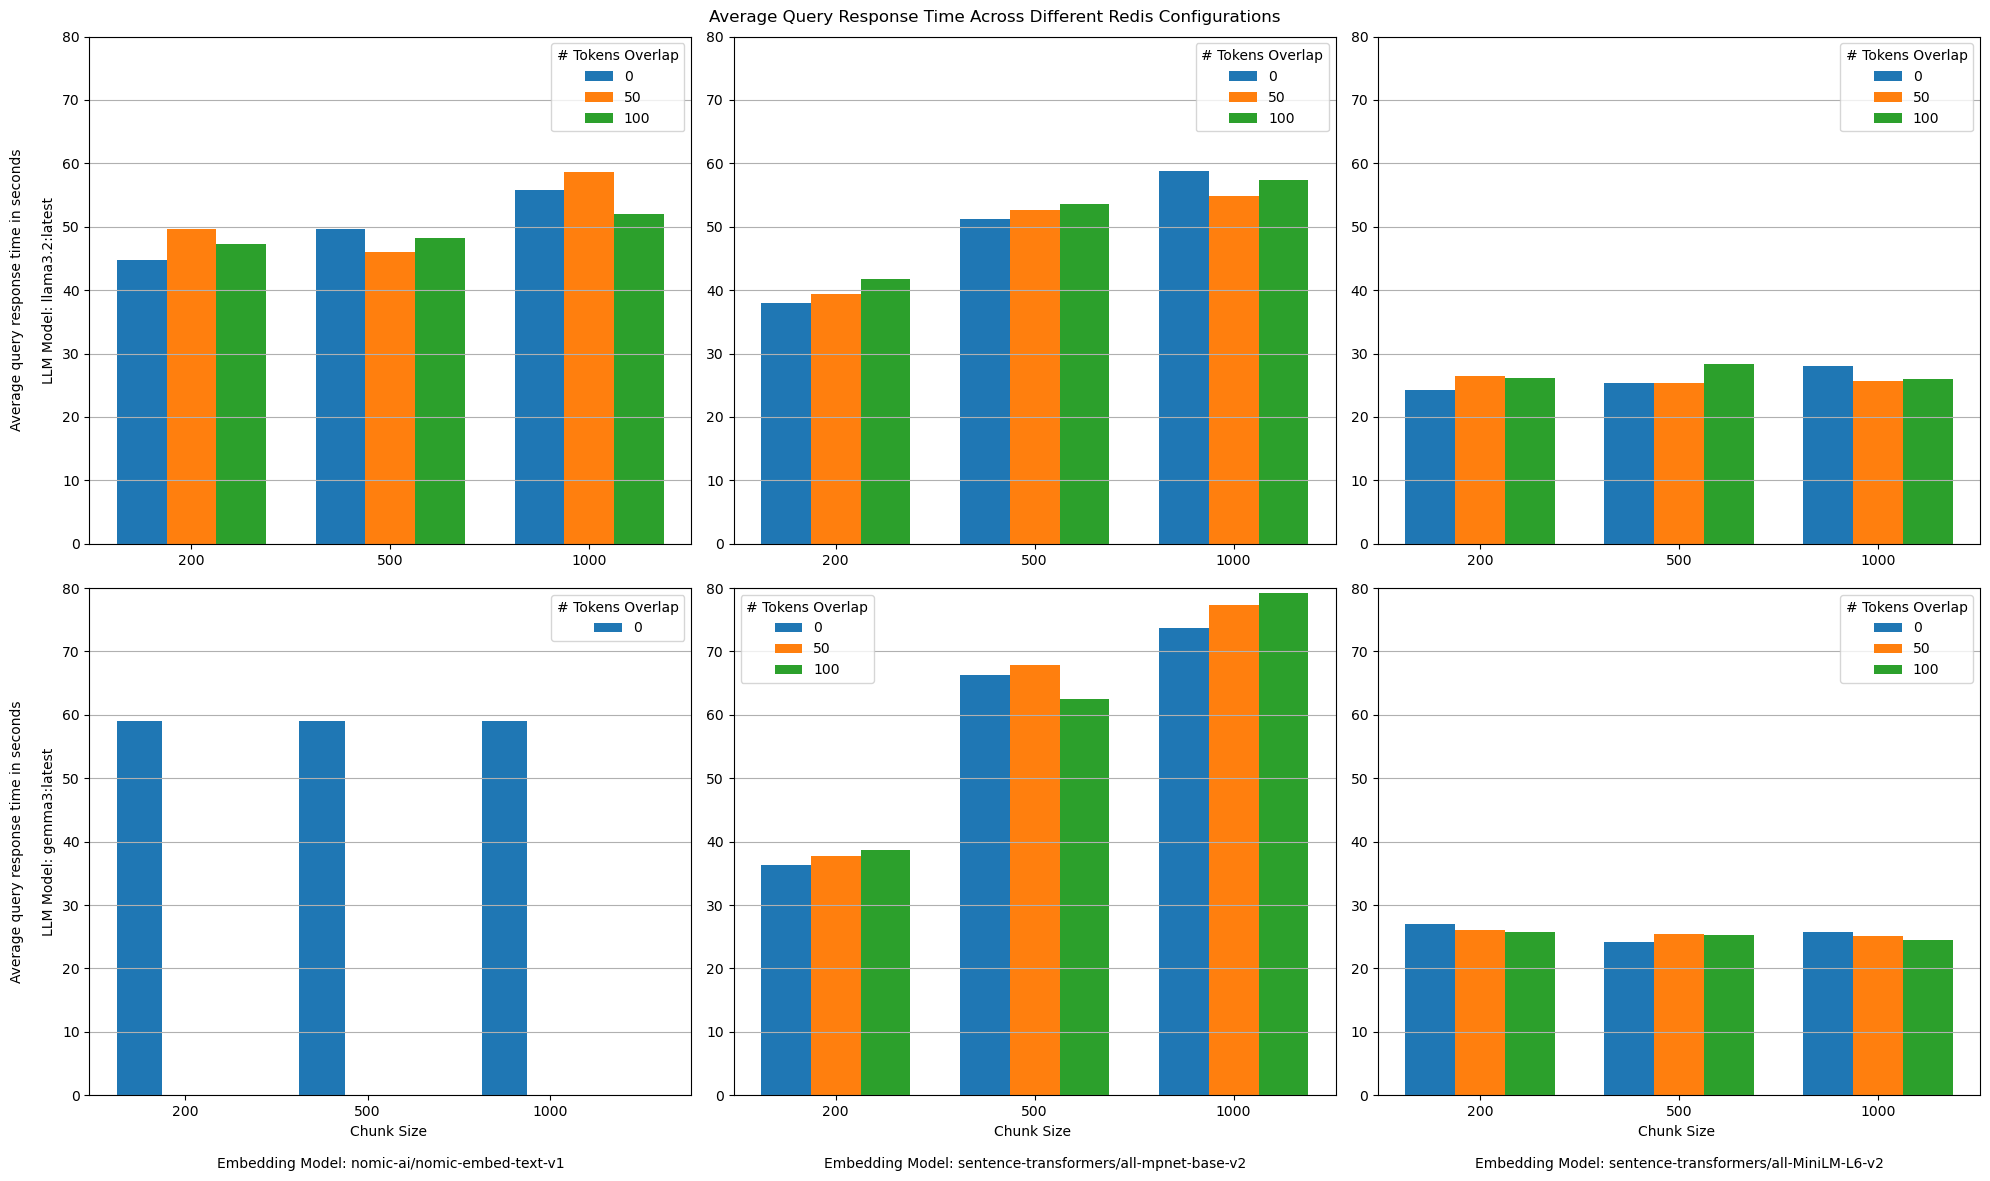

In [3]:
# Plot for comparing embedding model on redis
redis_embedding = redis.groupby(['embedding_model', 'llm_model', 'chunk_size', 'overlap']).mean()
redis_embedding = redis_embedding.reset_index()
model_setups = [(llm, emb) for llm in set(redis_embedding['llm_model']) 
                for emb in set(redis_embedding['embedding_model'])]

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

# Example: Plot random data in each subplot
for i, ax in enumerate(axes.flat):

    x = np.arange(3)
    width = 0.25
    mult = 0

    try:
        df = redis_embedding[(redis_embedding['embedding_model'] == model_setups[i][1]) &
                            (redis_embedding['llm_model'] == model_setups[i][0])].reset_index()

        for overlap in [0, 50, 100]:
            overlap_df = df[df['overlap'] == overlap]
            offset = width * mult
            rects = ax.bar(x + offset, overlap_df['query_time_elapsed'], width, label=str(overlap))
            mult += 1

    except:
        for overlap in [0, 50, 100]:
            overlap_df = df[df['overlap'] == overlap]
            offset = width * mult
            rects = ax.bar(x + offset, 0, width)
            mult += 1


    if i % 3 == 0:
        ax.set_ylabel(f'''Average query response time in seconds
                        \nLLM Model: {model_setups[i][0]}''')
        
    if i >= 3:
        ax.set_xlabel(f'''Chunk Size 
                        \nEmbedding Model: {model_setups[i][1]}''')

    ax.set_xticks(x + width, ['200', '500', '1000'])
    ax.set_ylim(0, 80)
    ax.grid(axis='y')
    ax.legend(title='# Tokens Overlap')

plt.suptitle('Average Query Response Time Across Different Redis Configurations')
plt.tight_layout()
plt.show()

In [9]:
qdrant_df = qdrant[(qdrant['llm_model'] == 'llama3.2:latest') &
                   (qdrant['embedding_model'] == 'sentence-transformers/all-mpnet-base-v2')]
qdrant_df['database'] = 'qdrant'

redis_df = redis[(redis['llm_model'] == 'llama3.2:latest') &
                  (redis['embedding_model'] == 'sentence-transformers/all-mpnet-base-v2')]
redis_df['database'] = 'redis'

chroma_df = chroma[(chroma['llm_model'] == 'llama3.2:latest') &
                  (chroma['embedding_model'] == 'sentence-transformers/all-mpnet-base-v2')]
chroma_df['database'] = 'chroma'

df = pd.concat([qdrant_df, redis_df, chroma_df])

C:\Users\kibbl\AppData\Local\Temp\ipykernel_15748\1807729855.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  redis_df['database'] = 'redis'
C:\Users\kibbl\AppData\Local\Temp\ipykernel_15748\1807729855.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chroma_df['database'] = 'chroma'
